# **Anggota Kelompok 5 TI-3E**
####1. Abiyyu Fiqlal S W (2241720014)
####2. Ferdi Riansyah R K (2241720264)
####3. Hana Sugianto (2241720102)
####4. Thoriq Fathurrozi (2241720052)

#**Soal UTS (Segmentasi Gambar dengan Clustering)**

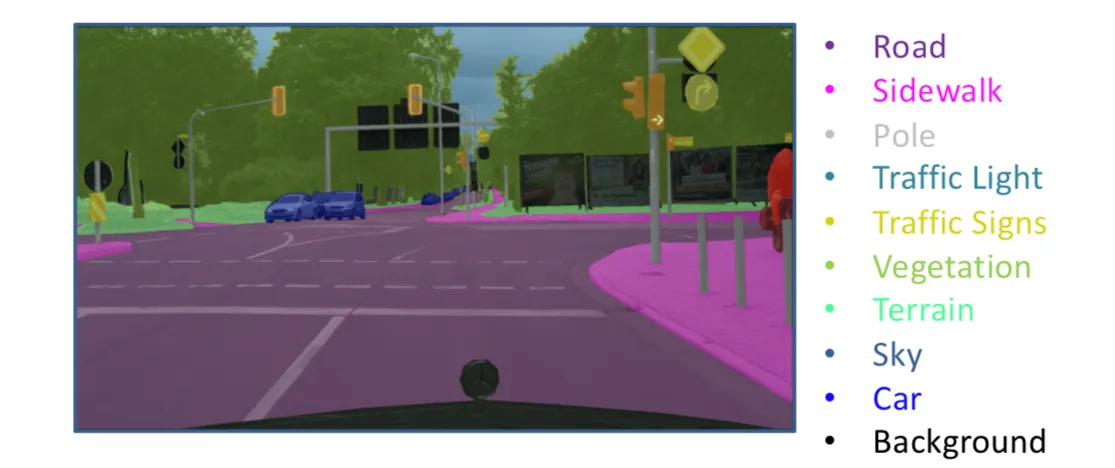

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

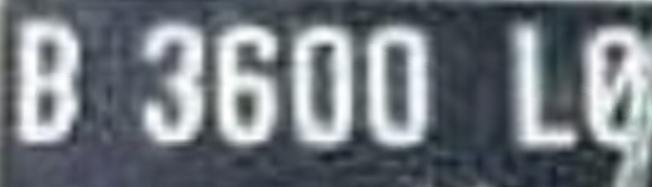

### **Ketentuan UTS**

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# **Pengerjaan**








##**Pendahuluan**
Program ini digunakan untuk memproses gambar melalui serangkaian tahapan, mulai dari memuat gambar, melakukan pra-pemrosesan, segmentasi menggunakan metode K-Means, evaluasi hasil segmentasi, hingga visualisasi. Dengan pendekatan ini, program dapat digunakan untuk berbagai aplikasi seperti analisis citra, deteksi objek, atau segmentasi area tertentu dalam gambar.


## **Tujuan**

1. Mengotomatiskan proses segmentasi citra menggunakan K-Means clustering.
2. Memvisualisasikan data warna piksel untuk analisis distribusi
3. Mengevaluasi hasil segmentasi menggunakan dua metrik utama:

    *   WCSS (Within-Cluster Sum of Squares): Mengukur kualitas kluster.
    *   Silhouette Score: Menilai seberapa baik kluster yang terbentuk.



## **Kebutuhan Sistem**

1. Bahasa Pemrograman Python 3.x.
2. Library yang Digunakan:

    *   OpenCV (cv2) untuk pemrosesan citra.
    *   NumPy untuk manipulasi array.
    *   Matplotlib untuk visualisasi.
    *   Scikit-learn untuk metrik evaluasi.
3. Google Colab (dengan akses ke Google Drive).

## **Code**

In [ ]:
#Melakukan Import Library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#melakukan koneksi akses ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Fungsi load_image(file_path)**

**Deskripsi:**

Memuat gambar dari jalur file yang diberikan.

**Parameter:**

file_path (str): Lokasi file gambar.
Keluaran:
Gambar dalam format array NumPy.


In [ ]:
#Fungsi Memuat gambar dengan paramete str file_path
def load_image(file_path):
    image = cv2.imread(file_path)
    if image is None:
        raise FileNotFoundError(f"Image at {file_path} could not be loaded.")
    return image

### **Fungsi preprocess_image(image)**

**Deskripsi:**

Mengubah gambar menjadi grayscale dan menerapkan Gaussian Blur.
Parameter:

**image (array):**

Gambar dalam format array NumPy.

**Keluaran:**

Gambar yang telah dipra-pemroses dalam format grayscale.

In [ ]:
#Fungsi convert gambar menjadi grayscale dan blured
def preprocess_image(image):
    #proses grayscale dengan openCV cvtColor
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #proses blurr gambar dengan  open CV GausianBlur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

### **Fungsi segment_kmeans(image, k=2)**

**Deskripsi:**

Melakukan segmentasi K-Means pada gambar.

**Parameter:**

1.   image (array): Gambar dalam format array NumPy.
2.   k (int): Jumlah kluster untuk segmentasi.
3.   Keluaran: Gambar yang telah disegmentasi.













In [ ]:
#Fungsi segmentasi gambar dengan K-means
def segment_kmeans(image, k=2):
    # Mengubah citra ke bentuk 2D untuk K-Means
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Definisi kriteria K-Means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Penerapan K-Means
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Ubah label ke bentuk citra
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

### **Fungsi plot_pixels(data, title, colors=None, N=10000)**

**Deskripsi:**

Membuat visualisasi distribusi warna piksel dalam ruang warna RGB.

**Parameter:**

1.   data (array): Data piksel gambar.
2.   title (str): Judul grafik.
3.   colors (array, opsional): Warna piksel untuk visualisasi.
4.   N (int, opsional): Jumlah sampel piksel yang divisualisasikan.






In [ ]:
#Fungsi membuat visualisasi distribusi wartna (RGB)
def plot_pixels(data, title, colors=None, N=10000):

    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    plt.figure(figsize=(6, 4))
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)
    plt.show()

### **Fungsi evaluate_segmentation(segmented_image, k, pixel_values)**

**Deskripsi:**

Mengevaluasi hasil segmentasi menggunakan WCSS dan Silhouette Score.

**Parameter:**


1.   segmented_image (array): Gambar hasil segmentasi.
2.   k (int): Jumlah kluster.
3.   pixel_values (array): Data piksel asli gambar.






In [ ]:
#Fungsi visualisasi hasil segmentasi WCSS dan Silhouette Score
def evaluate_segmentation(segmented_image, k, pixel_values):
    pixel_values = np.float32(pixel_values)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 10, cv2.KMEANS_RANDOM_CENTERS)

    # Menghitung WCSS
    wcss = 0
    for i in range(k):
        cluster_points = pixel_values[labels.flatten() == i]
        cluster_center = centers[i]
        wcss += np.sum((cluster_points - cluster_center) ** 2)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(pixel_values, labels.flatten())

    print(f"WCSS (Within-Cluster Sum of Squares): {wcss}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")


### **Fungsi visualize_results(original, preprocessed, segmented)**

**Deskripsi:**

Menampilkan gambar asli, pra-pemrosesan, dan hasil segmentasi.

**Parameter:**
1.   original (array): Gambar asli.
2.   preprocessed (array): Gambar hasil pra-pemrosesan.
3.   segmented (array): Gambar hasil segmentasi.






In [ ]:
def visualize_results(original, preprocessed, segmented):
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    # Preprocessed Image
    plt.subplot(1, 3, 2)
    plt.imshow(preprocessed, cmap='gray')
    plt.title("Preprocessed (Grayscale + Blur)")
    plt.axis("off")

    # Segmented Image
    plt.subplot(1, 3, 3)
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented")
    plt.axis("off")

    plt.show()

### **Fungsi process_image(file_path, k=2)**
**Deskripsi:**

Fungsi utama yang menggabungkan semua langkah dari memuat gambar hingga evaluasi.

**Parameter:**


1.   file_path (str): Lokasi file gambar.
2.   k (int): Jumlah kluster untuk segmentasi.






In [ ]:
def process_image(file_path, k=2):
    # Memuat citra
    image = load_image(file_path)
    print(f"Processing image: {file_path}")

    # Pra-pemrosesan
    preprocessed = preprocess_image(image)

    # Visualisasi distribusi piksel (citra asli)
    data = image.reshape((-1, 3)) / 255.0
    plot_pixels(data, title="Pixel Distribution (Original)")

    # Segmentasi
    segmented = segment_kmeans(image, k)

    # Visualisasi distribusi piksel (citra tersegmentasi)
    segmented_data = segmented.reshape((-1, 3)) / 255.0
    plot_pixels(segmented_data, title="Pixel Distribution (Segmented)")

    # Visualisasi hasil pra-pemrosesan dan segmentasi
    visualize_results(image, preprocessed, segmented)

    # Evaluasi hasil segmentasi
    pixel_values = image.reshape((-1, 3))
    evaluate_segmentation(segmented, k, pixel_values)


### **Image Plat Nomor 1**

Processing image: /content/drive/MyDrive/image/photo (1).jpg


<Figure size 600x400 with 0 Axes>

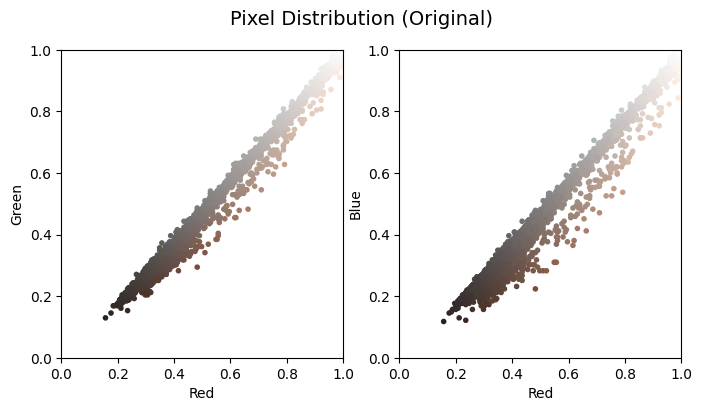

<Figure size 600x400 with 0 Axes>

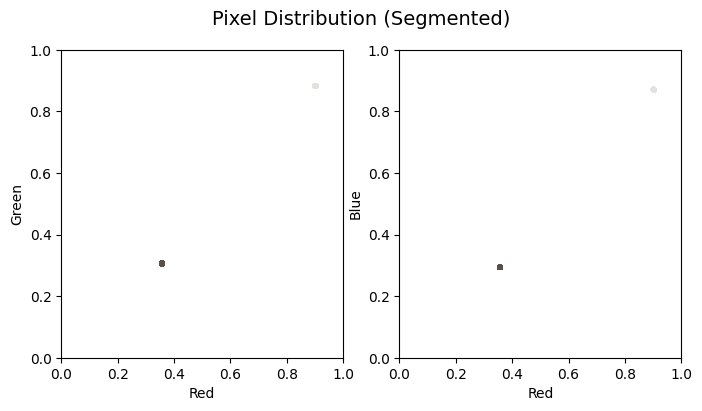

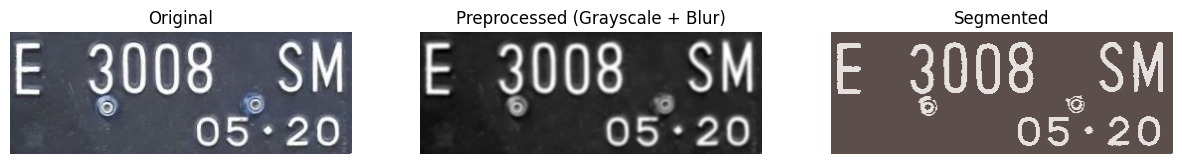

WCSS (Within-Cluster Sum of Squares): 40513858.0
Silhouette Score: 0.8694


In [ ]:
file_path = "/content/drive/MyDrive/image/photo (1).jpg"
process_image(file_path)

### **Image Plat Nomor 2**

Processing image: /content/drive/MyDrive/image/photo (2).jpg


<Figure size 600x400 with 0 Axes>

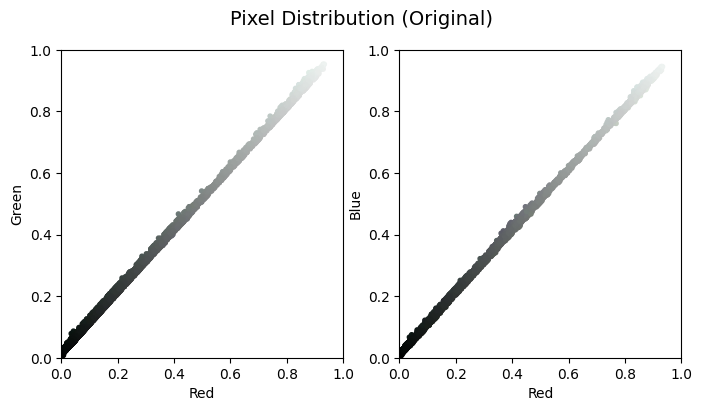

<Figure size 600x400 with 0 Axes>

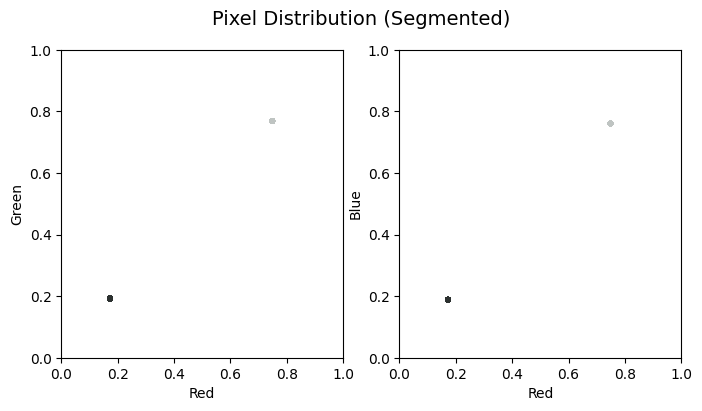

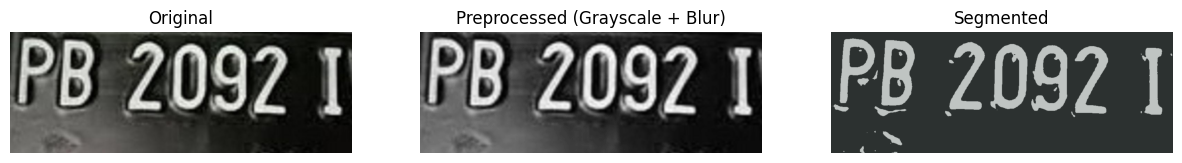

WCSS (Within-Cluster Sum of Squares): 1207609776.0
Silhouette Score: 0.6992


In [ ]:
file_path = "/content/drive/MyDrive/image/photo (2).jpg"
process_image(file_path)

### **Image Plat Nomor 3**

Processing image: /content/drive/MyDrive/image/photo (3).jpg


<Figure size 600x400 with 0 Axes>

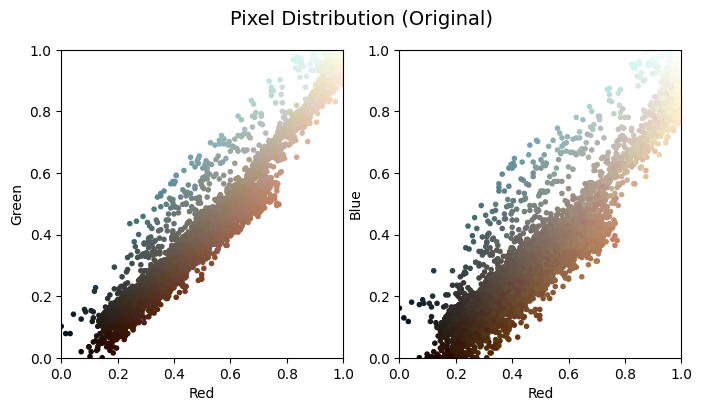

<Figure size 600x400 with 0 Axes>

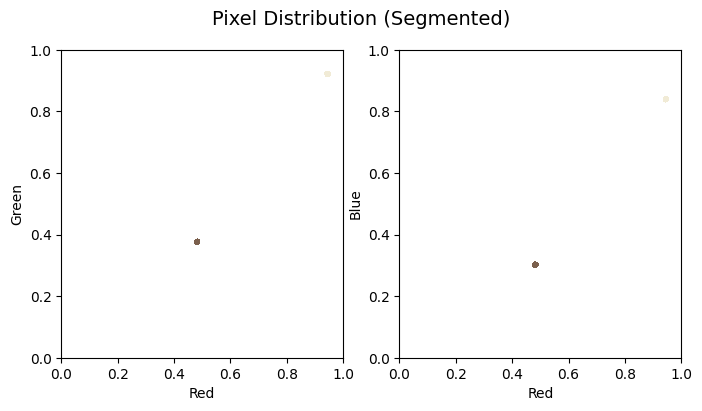

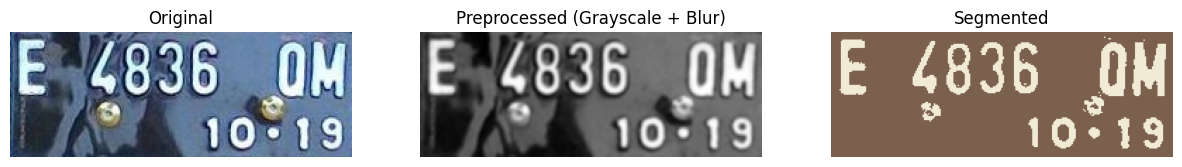

WCSS (Within-Cluster Sum of Squares): 75976503.5
Silhouette Score: 0.6928


In [ ]:
file_path = "/content/drive/MyDrive/image/photo (3).jpg"
process_image(file_path)

### **Image Plat Nomor 4**

Processing image: /content/drive/MyDrive/image/photo (4).jpg


<Figure size 600x400 with 0 Axes>

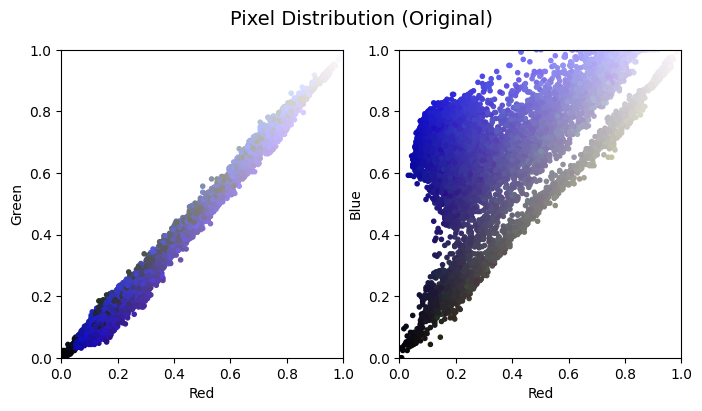

<Figure size 600x400 with 0 Axes>

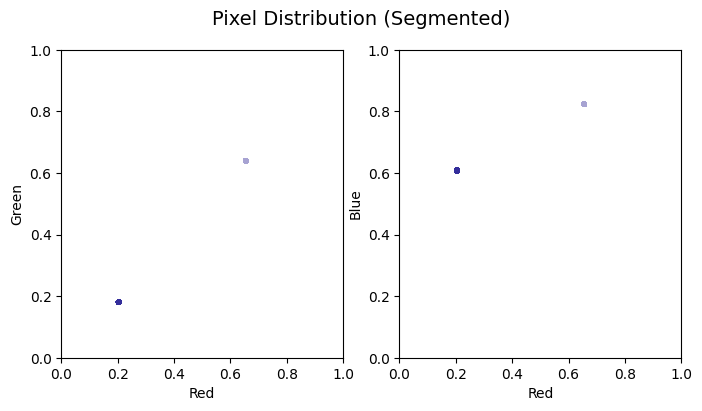

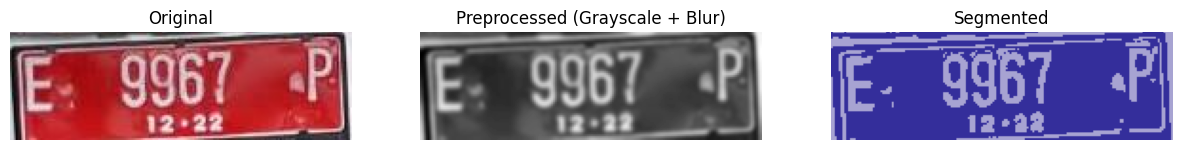

WCSS (Within-Cluster Sum of Squares): 31770358.0
Silhouette Score: 0.6115


In [ ]:
file_path = "/content/drive/MyDrive/image/photo (4).jpg"
process_image(file_path)

### **Image Plat Nomor 5**

Processing image: /content/drive/MyDrive/image/photo (5).jpg


<Figure size 600x400 with 0 Axes>

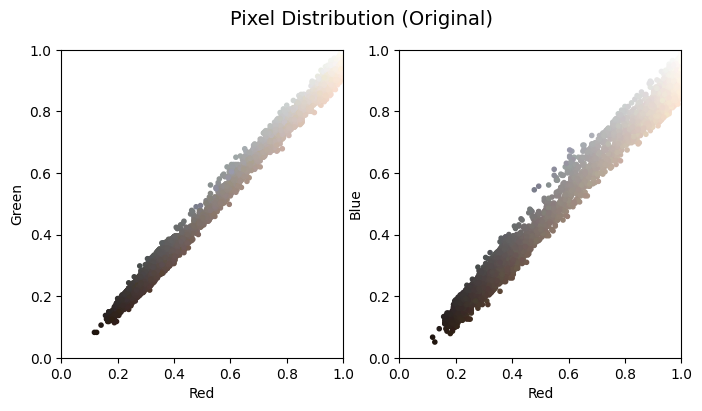

<Figure size 600x400 with 0 Axes>

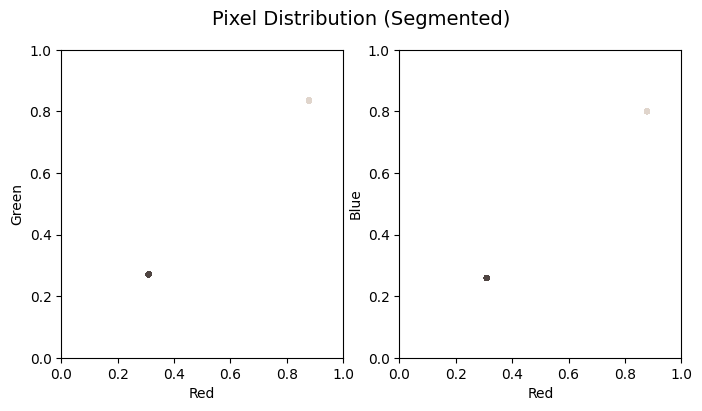

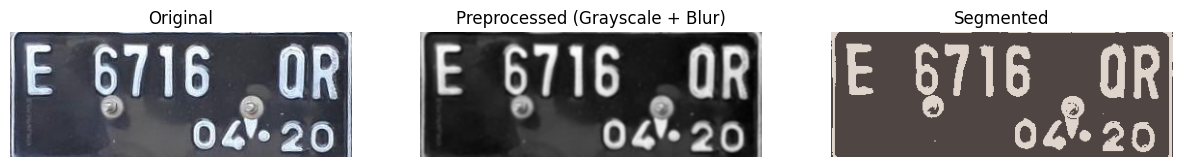

WCSS (Within-Cluster Sum of Squares): 60489192.0
Silhouette Score: 0.8273


In [ ]:
file_path = "/content/drive/MyDrive/image/photo (5).jpg"
process_image(file_path)

### **Kesimpulan**

Proyek ini berhasil menunjukkan bagaimana teknik pengolahan citra digital dapat digunakan untuk segmentasi gambar secara efektif menggunakan algoritma K-Means Clustering. Dengan pendekatan ini, gambar dapat diproses untuk mengenali pola dan kelompok warna tertentu, yang berguna dalam berbagai aplikasi seperti pengenalan objek, analisis visual, hingga pengembangan sistem berbasis komputer vision.

Melalui tahapan yang meliputi pra-pemrosesan gambar, segmentasi K-Means, evaluasi hasil, dan visualisasi data, kami memperoleh hasil yang tidak hanya akurat tetapi juga mudah dianalisis. Selain itu, metrik seperti WCSS (Within-Cluster Sum of Squares) dan Silhouette Score memberikan gambaran mendalam tentang kualitas segmentasi yang dihasilkan.

Proyek ini menunjukkan pentingnya kombinasi antara algoritma yang kuat, metode evaluasi yang tepat, dan visualisasi hasil untuk menghasilkan pemahaman yang komprehensif terhadap data gambar.